# README
- 最小限
- irisのデータはわかっている前提

In [21]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

In [22]:
from sklearn.datasets import load_iris

iris = load_iris()

In [23]:
# sklearnの変数名っぽくしておく
X = iris.data
y = iris.target

In [24]:
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X,
                                                          y,
                                                          train_size=0.70,
                                                          random_state=0)

In [25]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression

C_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
C_list = [10**i for i in range(-10,  10)]
best_C = 0
best_mean_acc = 0

all_acc = []
all_std = []

for c in C_list:
    valid_scores = []

    for train_index, valid_index in skf.split(X_trainval, y_trainval):
        X_train, X_valid = X_trainval[train_index], X_trainval[valid_index]
        y_train, y_valid = y_trainval[train_index], y_trainval[valid_index]

        clf = LogisticRegression(C=c, multi_class='auto', solver='liblinear')
        clf.fit(X_train, y_train)

        acc_valid = clf.score(X_valid, y_valid)
        valid_scores.append(acc_valid)

    mean_acc = np.mean(valid_scores)
    mean_std = np.std(valid_scores)

    all_acc.append(mean_acc)
    all_std.append(mean_std)

    if mean_acc > best_mean_acc:
        best_mean_acc = mean_acc
        best_C = c

print(f'Best C: {best_C}')
print(f'Best acc: {best_mean_acc:.3f}')

Best C: 10
Best acc: 0.979


Text(0, 0.5, 'Accuracy')

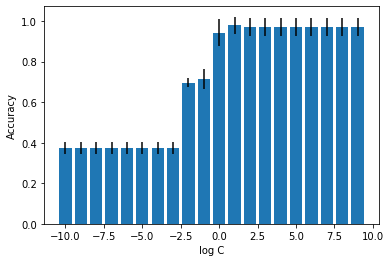

In [42]:
plt.bar(np.log10(C_list), all_acc, yerr=all_std)

plt.xlabel('log C')
plt.ylabel('Accuracy')

In [44]:
retrained_model = LogisticRegression(C=best_C,
                                     multi_class='auto',
                                     solver='liblinear')

retrained_model.fit(X_trainval, y_trainval)

final_score = retrained_model.score(X_test, y_test)
print(f'Test acc: {final_score:.3f}')

Test acc: 0.933


おわり